---

### Libraries:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

---

### 1. In the Drive folder you have a dataset 'Diabetes_data.csv', read the dataset into Pandas.

In [72]:
# Read the dataset into python using pandas:
df = pd.read_csv('Diabetes_data.csv')

In [73]:
df.to_html('Diabetes_dataset.html')

In [74]:
df

,Unnamed: 0,Kolku dolgo e dijabeticar,Kolku mu e tromesechen (hemoglobin A1C) she4er,Dali e na insulin ili na tabli?,Glukoza (momentalna) vo krv,Dali ima dijabetesna retinopatija?
0,0,3.0,9.522692,0.0,1.747037,1.0
1,1,40.0,6.397994,0.0,6.416253,1.0
2,2,38.0,7.079202,0.0,7.006710,0.0
3,3,16.0,4.400294,1.0,5.614222,0.0
4,4,17.0,4.746816,1.0,4.919372,1.0
...,...,...,...,...,...,...
995,995,25.0,8.890070,0.0,5.404914,0.0
996,996,44.0,11.036004,1.0,7.315449,0.0
997,997,42.0,4.943409,0.0,6.568171,0.0
998,998,29.0,6.485128,0.0,4.110812,1.0


---

-------

### 2. The data is slopily gathered and you need to rename, correct, and handle missing values. Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything).

In [75]:
# Print information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      1000 non-null   int64  
 1   Kolku dolgo e dijabeticar                       979 non-null    float64
 2   Kolku mu e tromesechen (hemoglobin A1C) she4er  973 non-null    float64
 3   Dali e na insulin ili na tabli?                 988 non-null    float64
 4   Glukoza (momentalna) vo krv                     986 non-null    float64
 5   Dali ima dijabetesna retinopatija?              970 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [76]:
# how much null values are in each column
df.isnull().sum()

Unnamed: 0                                         0
Kolku dolgo e dijabeticar                         21
Kolku mu e tromesechen (hemoglobin A1C) she4er    27
Dali e na insulin ili na tabli?                   12
Glukoza (momentalna) vo krv                       14
Dali ima dijabetesna retinopatija?                30
dtype: int64

In [77]:
# check the rows with null values
df_null=df[df.isnull().values.any(axis=1)]
df_null

,Unnamed: 0,Kolku dolgo e dijabeticar,Kolku mu e tromesechen (hemoglobin A1C) she4er,Dali e na insulin ili na tabli?,Glukoza (momentalna) vo krv,Dali ima dijabetesna retinopatija?
19,19,42.0,NaN,1.0,8.979728,0.0
27,27,NaN,2.937837,NaN,4.187385,1.0
37,37,19.0,NaN,0.0,5.212757,0.0
39,39,24.0,2.497787,1.0,NaN,0.0
55,55,27.0,NaN,0.0,2.705438,0.0
...,...,...,...,...,...,...
944,944,33.0,4.998384,0.0,4.337744,NaN
968,968,31.0,NaN,1.0,NaN,0.0
971,971,NaN,8.183514,0.0,5.580051,0.0
977,977,28.0,2.639164,1.0,7.284258,NaN


##### Note:
Approximately 10% of the data contains null values.<br>
We have a few options to handle these null values: we can leave them as is, replace them, or delete the rows that contain null values.<br>
I have decided to delete the rows with null values in order to maintain a well-defined dataset.

In [78]:
# save copy of the org data set
df_org = df
# save df as copy of df
df=df.copy()
# drop the row that have null values
df=df.dropna()

In [79]:
# list of the columns
df.columns

Index(['Unnamed: 0', 'Kolku dolgo e dijabeticar',
       'Kolku mu e tromesechen (hemoglobin A1C) she4er',
       'Dali e na insulin ili na tabli?', 'Glukoza (momentalna) vo krv',
       'Dali ima dijabetesna retinopatija?'],
      dtype='object')

In [80]:
# delete column 
del df['Unnamed: 0']

In [81]:
# Reseting the index to the default integer index beginning at 0, in order the data indexes to be continuous.

df.reset_index(inplace = True, drop = True)
df

,Kolku dolgo e dijabeticar,Kolku mu e tromesechen (hemoglobin A1C) she4er,Dali e na insulin ili na tabli?,Glukoza (momentalna) vo krv,Dali ima dijabetesna retinopatija?
0,3.0,9.522692,0.0,1.747037,1.0
1,40.0,6.397994,0.0,6.416253,1.0
2,38.0,7.079202,0.0,7.006710,0.0
3,16.0,4.400294,1.0,5.614222,0.0
4,17.0,4.746816,1.0,4.919372,1.0
...,...,...,...,...,...
898,25.0,8.890070,0.0,5.404914,0.0
899,44.0,11.036004,1.0,7.315449,0.0
900,42.0,4.943409,0.0,6.568171,0.0
901,29.0,6.485128,0.0,4.110812,1.0


In [82]:
# check the columns name
df.columns

Index(['Kolku dolgo e dijabeticar',
       'Kolku mu e tromesechen (hemoglobin A1C) she4er',
       'Dali e na insulin ili na tabli?', 'Glukoza (momentalna) vo krv',
       'Dali ima dijabetesna retinopatija?'],
      dtype='object')

In [83]:
# Rename columns name to: 

# "Disease_length"
# "Hemoglobin_A1C_levels"
# "Insulin_1_or_Tablets_0"
# "Glucose_levels"
# "Diabetic_Retinopathy"

df.rename(columns = {'Kolku dolgo e dijabeticar':"Disease_length",
          'Kolku mu e tromesechen (hemoglobin A1C) she4er':"Hemoglobin_A1C_levels", 
          'Dali e na insulin ili na tabli?':"Insulin_1_or_Tablets_0", 
          'Glukoza (momentalna) vo krv':"Glucose_levels", 
          'Dali ima dijabetesna retinopatija?':"Diabetic_Retinopathy"}, inplace = True)

In [84]:
df.head(2)

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy
0,3.0,9.522692,0.0,1.747037,1.0
1,40.0,6.397994,0.0,6.416253,1.0


In [85]:
# cast values in the below columns to integer

# df['Insulin_1_or_Tablets_0'].iloc[0]

df = df.astype({"Disease_length": int, "Insulin_1_or_Tablets_0" : int,"Diabetic_Retinopathy": int})

In [86]:
# check the data
df.head(2)

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy
0,3,9.522692,0,1.747037,1
1,40,6.397994,0,6.416253,1


In [87]:
# delete duplicates if any
df.drop_duplicates()

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy
0,3,9.522692,0,1.747037,1
1,40,6.397994,0,6.416253,1
2,38,7.079202,0,7.006710,0
3,16,4.400294,1,5.614222,0
4,17,4.746816,1,4.919372,1
...,...,...,...,...,...
898,25,8.890070,0,5.404914,0
899,44,11.036004,1,7.315449,0
900,42,4.943409,0,6.568171,0
901,29,6.485128,0,4.110812,1


---

### 3. Find the patient which currently has the highest glucose level. Sketch (on a plot of your choice) all of the patients glucose levels and describe the plot. Draw a conclusion on how the data behaves.

In [88]:
df.loc[df['Glucose_levels'].idxmax()]

Disease_length            36.000000
Hemoglobin_A1C_levels      8.885855
Insulin_1_or_Tablets_0     1.000000
Glucose_levels            12.598831
Diabetic_Retinopathy       0.000000
Name: 599, dtype: float64

In [89]:
df[df['Glucose_levels']==df['Glucose_levels'].max()]

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy
599,36,8.885855,1,12.598831,0


In [90]:
# 3.1 Find the patient which currently has the highest glucose level. 

index_hgl = df[df['Glucose_levels']==df['Glucose_levels'].max()].index[0]

high_gluc_level = df[df['Glucose_levels']==df['Glucose_levels'].max()].iloc[0]['Glucose_levels']

print(f'\nThe patient with index {index_hgl} has the highest glucose level of {high_gluc_level}')


The patient with index 599 has the highest glucose level of 12.598831418508324


In [91]:
# The lowest value is slightly above zero and the index is around ~580

df[df['Glucose_levels']==df['Glucose_levels'].min()]

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy
581,35,9.636928,1,0.103751,1


In [92]:
# the average blood glucose value 

df['Glucose_levels'].mean()

6.083059151918294

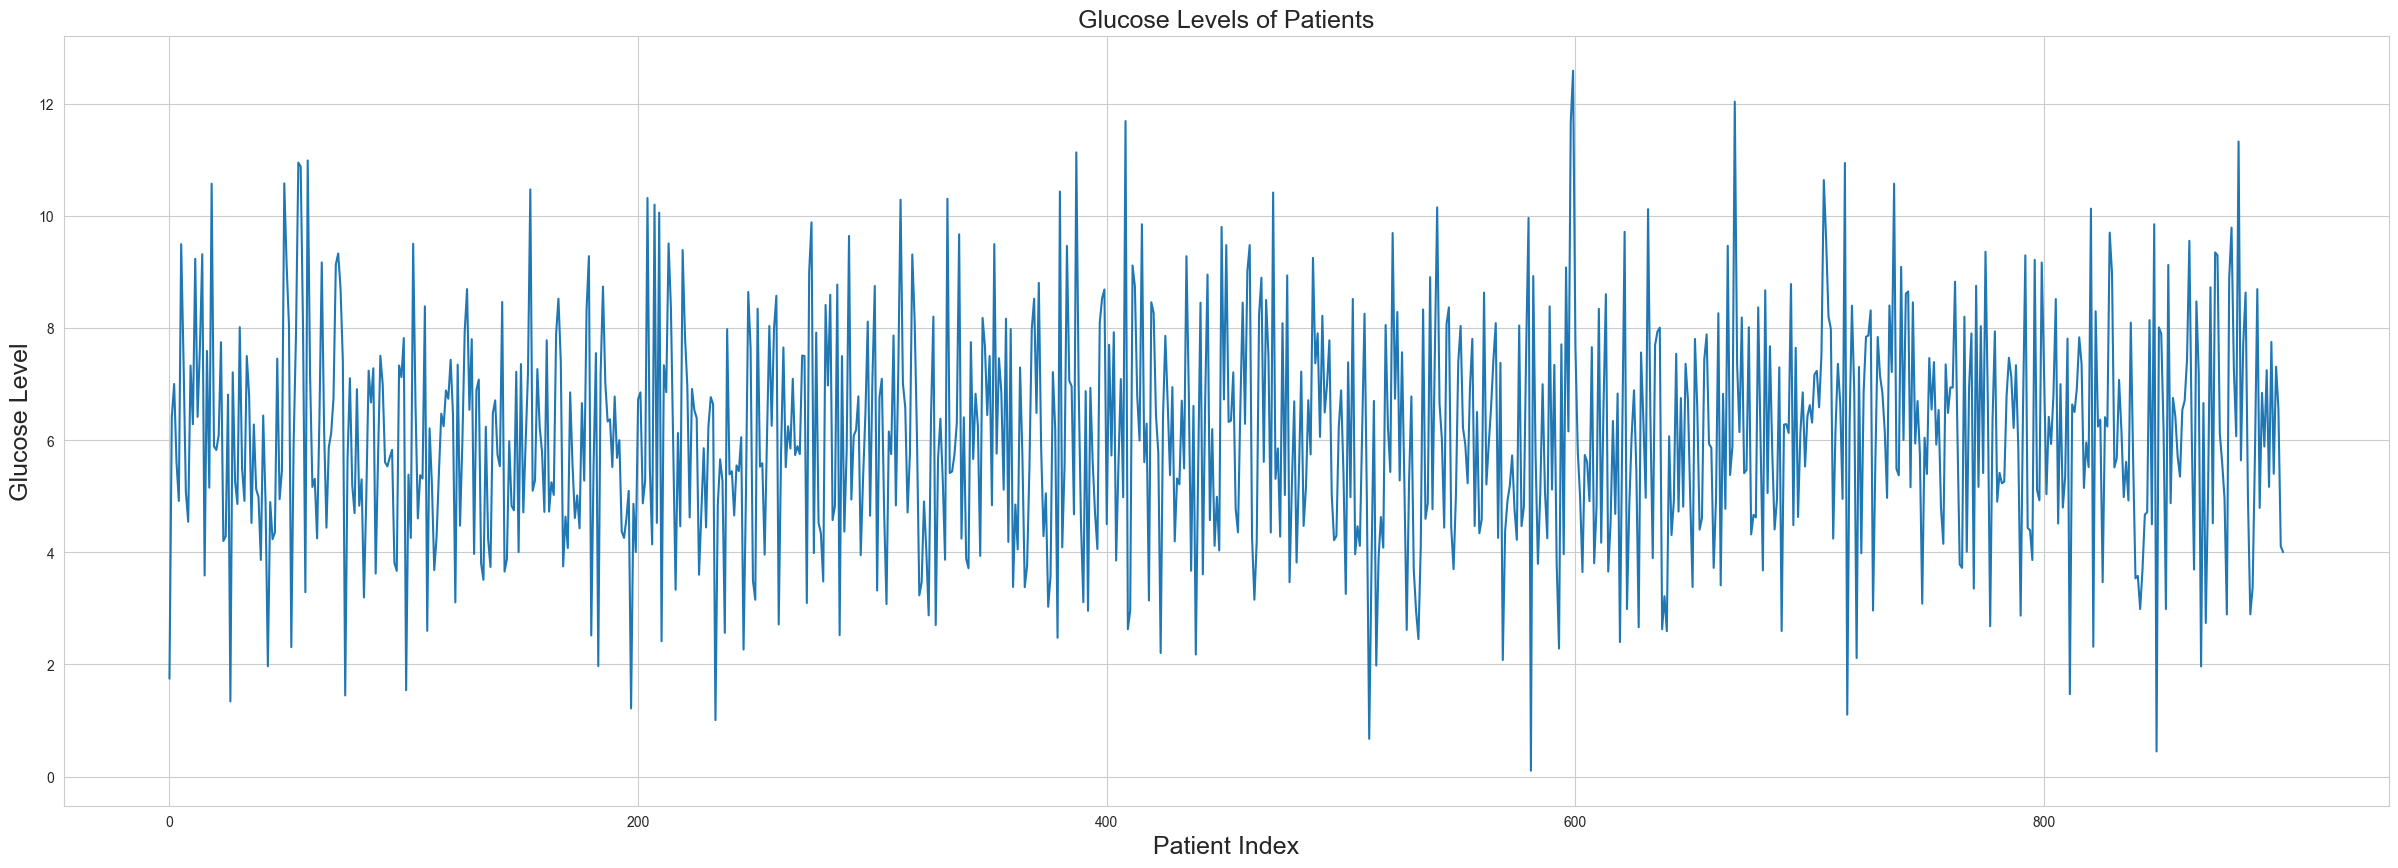

In [93]:
# 3.2 Sketch (on a plot of your choice) all of the patients glucose levels 

# Create a plot
plt.figure(figsize=(30, 10))  # Adjust the figure size 
plt.plot(df['Glucose_levels'], linestyle='-')
plt.title("Glucose Levels of Patients", fontsize=18)
plt.xlabel("Patient Index", fontsize=18)
plt.ylabel("Glucose Level", fontsize=18)
plt.grid(True)

# Show the plot
plt.show()

In [94]:
# 3.2.1 describe the plot. Draw a conclusion on how the data behaves.

Notes: 
1) The graph reminds me of a waveform graph similar to a white noise signal.
2) Some scheme of repeating glucose values ​​every ~ 200 index.
3) And according to the graph it can be noted that:<br>
 the maximum value is ~12.5 (according to calculations 12,598)<br>
 very close to index 600 (according to calculations - index 599)<br>
4) The lowest value is slightly above zero, and the index is about ~580
5) The most common blood glucose values ​​are in the range of 4-8;
 values ​​in the range 2-4 and 8-10 are less frequent; values ​​<2 and >10 are more rare.
6) The distribution of the data along the value 6, so it can be said that the average value of blood glucose is about 6.

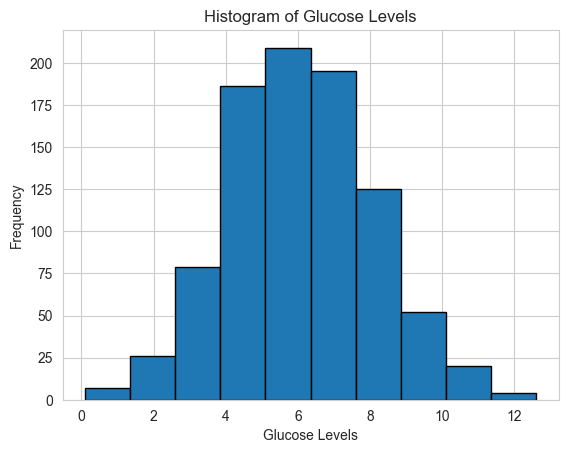

In [95]:
# histogram

plt.hist(df['Glucose_levels'], bins=10, edgecolor='k')
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose Levels')
plt.show()

Note:

Histogram reflects the previous observations:<br>
Average value of blood glucose around 6, range of most common values, range of less common / rare values.

---

---

### 4. Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Sketch the data on a plot of your choice to best describe the data. Write a sentence or two describing how the data behaves.

In [96]:
# 4.1 Find the average number of hemoglobin A1C levels of patients per length of disease

df_A1C = df.groupby(["Disease_length"])['Hemoglobin_A1C_levels'
                              ].mean().reset_index().sort_values(by='Hemoglobin_A1C_levels', ascending=False)
df_A1C.head()

,Disease_length,Hemoglobin_A1C_levels
29,30,7.902823
33,34,7.292975
36,37,7.149612
0,1,7.140726
17,18,7.121592


In [97]:
# 4.2 Which duration of the disease has the highest average glucose levels?

highest_aver_gluc_levels = df_A1C.iloc[0]['Hemoglobin_A1C_levels']

Disease_length_hagl = df_A1C.iloc[0]['Disease_length']

print(f'\nPatients with {Disease_length_hagl} years of the disease duration has the highest average glucose levels of {highest_aver_gluc_levels}\n')


Patients with 30.0 years of the disease duration has the highest average glucose levels of 7.902822800633029



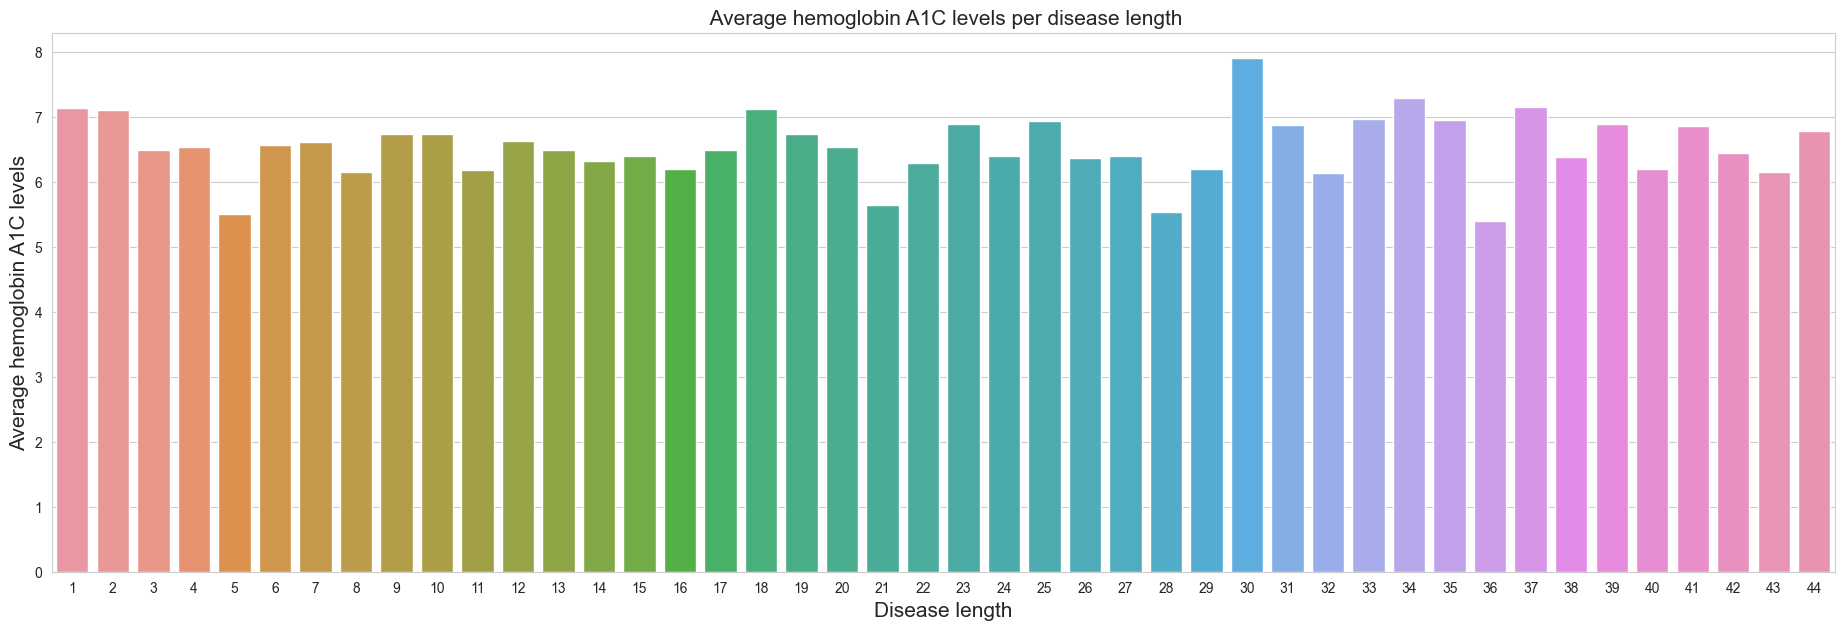

In [98]:
# 4.3 Sketch the data on a plot of your choice to best describe the data. 

fig = plt.figure(figsize=(23, 7))

sns.barplot(df_A1C, x='Disease_length',y='Hemoglobin_A1C_levels')
plt.title(" Average hemoglobin A1C levels per disease length", fontsize=15)
plt.xlabel("Disease length", fontsize=15)
plt.ylabel("Average hemoglobin A1C levels", fontsize=15)
plt.show()

Text(0, 0.5, 'Average hemoglobin A1C levels')

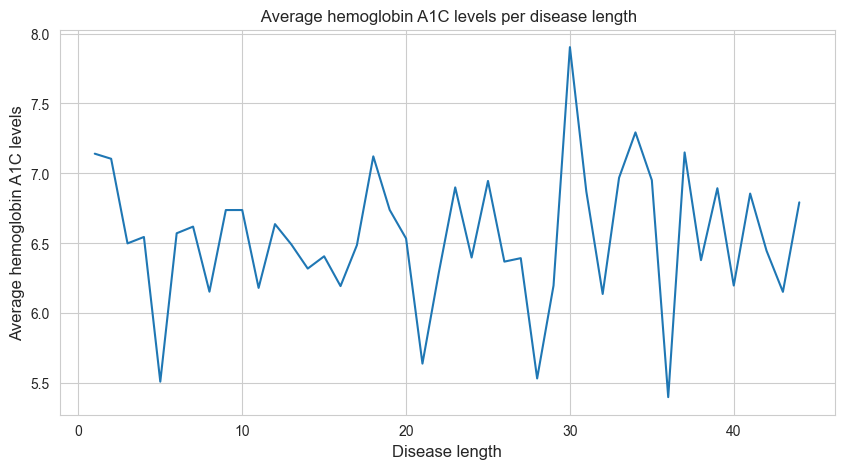

In [99]:
fig = plt.figure(figsize=(10, 5))

sns.set_style("whitegrid")
sns.lineplot(data=df_A1C, x="Disease_length", y="Hemoglobin_A1C_levels")
plt.title(" Average hemoglobin A1C levels per disease length", fontsize=12)
plt.xlabel("Disease length", fontsize=12)
plt.ylabel("Average hemoglobin A1C levels", fontsize=12)

In [100]:
# 4.4 Write a sentence or two describing how the data behaves.

Note:

According to the graphs, we notice that:
- in the first 5 years of the disease, we have a drastic reduction in the level of 3 month sugar;
- after the 5th year, there is a sharp increase in the values, then stabilization over a period of ~ 11 years with an average new 3-month sugar around 6.5;
- after the 16th year, we again have an increase in the level followed by a sharp decrease in the values ​​of the 3-month sugar, similar to the first 5 years, but the stabilization period is shorter and with an average value of around 6.7
- after the 28th year of the disease until the 36th year, there is a rise and fall of the values ​​without a period of stabilization; in this period is the highest and lowest level of the 3-month sugar.
- after 36 years, after the increase there is a period of stabilization

-----

---

### 5. Find the average duration of the disease for patients that are on insulin and patients that are on tablets. Compare the results. Which method that the patients use shows better results?

In [101]:
df.head(2)

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy
0,3,9.522692,0,1.747037,1
1,40,6.397994,0,6.416253,1


In [102]:
# data frame grouped by column Insulin_1_or_Tablets_0

avg_dis_len = df.groupby('Insulin_1_or_Tablets_0')['Disease_length'
                                                  ].mean().reset_index()[['Disease_length','Insulin_1_or_Tablets_0']]

In [103]:
avg_dis_len 

,Disease_length,Insulin_1_or_Tablets_0
0,22.434004,0
1,22.793860,1


In [104]:
# 5.1. The average duration of the disease for patients that are on tablets

avg_dis_len_tabl = avg_dis_len['Disease_length'][avg_dis_len['Insulin_1_or_Tablets_0']==0][0]
avg_dis_len_tabl

22.434004474272932

In [105]:
# 5.2. The average duration of the disease for patients that are on insulin

avg_dis_len_insl = avg_dis_len['Disease_length'][avg_dis_len['Insulin_1_or_Tablets_0']==1][1]
avg_dis_len_insl

22.79385964912281

In [106]:
# 5.3. Compare the results. Which method that the patients use shows better results?

print(f'\nThe average duration of the disease for patients on:\n \nInsulin - {avg_dis_len_insl} years \nTablets - {avg_dis_len_tabl} years')


The average duration of the disease for patients on:
 
Insulin - 22.79385964912281 years 
Tablets - 22.434004474272932 years


In [107]:
# difference  

abs_diff = abs(avg_dis_len_tabl-avg_dis_len_insl)
abs_diff

0.3598551748498764

Note:

 The difference between the 2 groups is ~0.36 years. This is a very small and not significant difference to draw concrete conclusions.<br>
 According to the results, patients on the pill showed  imperceptibly better results in terms of duration of the disease.

---

-----

### 6. A normal hemoglobin A1C glucose level is below 5.7. Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level), then sketch the data using a plot of your choice dependent on the length of the disease. Distinguishing both groups.

In [108]:
# define the threshold for A1C glucose level

A1C_threshold = 5.7

In [109]:
# 6.1 Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level)

# Adding new column according Hemoglobin A1C level

df['A1C_elevated']=df['Hemoglobin_A1C_levels'].apply(lambda x: x > A1C_threshold).astype(int)

In [110]:
df.head(2)

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy,A1C_elevated
0,3,9.522692,0,1.747037,1,1
1,40,6.397994,0,6.416253,1,1


Text(0, 0.5, 'Hemoglobin A1C levels')

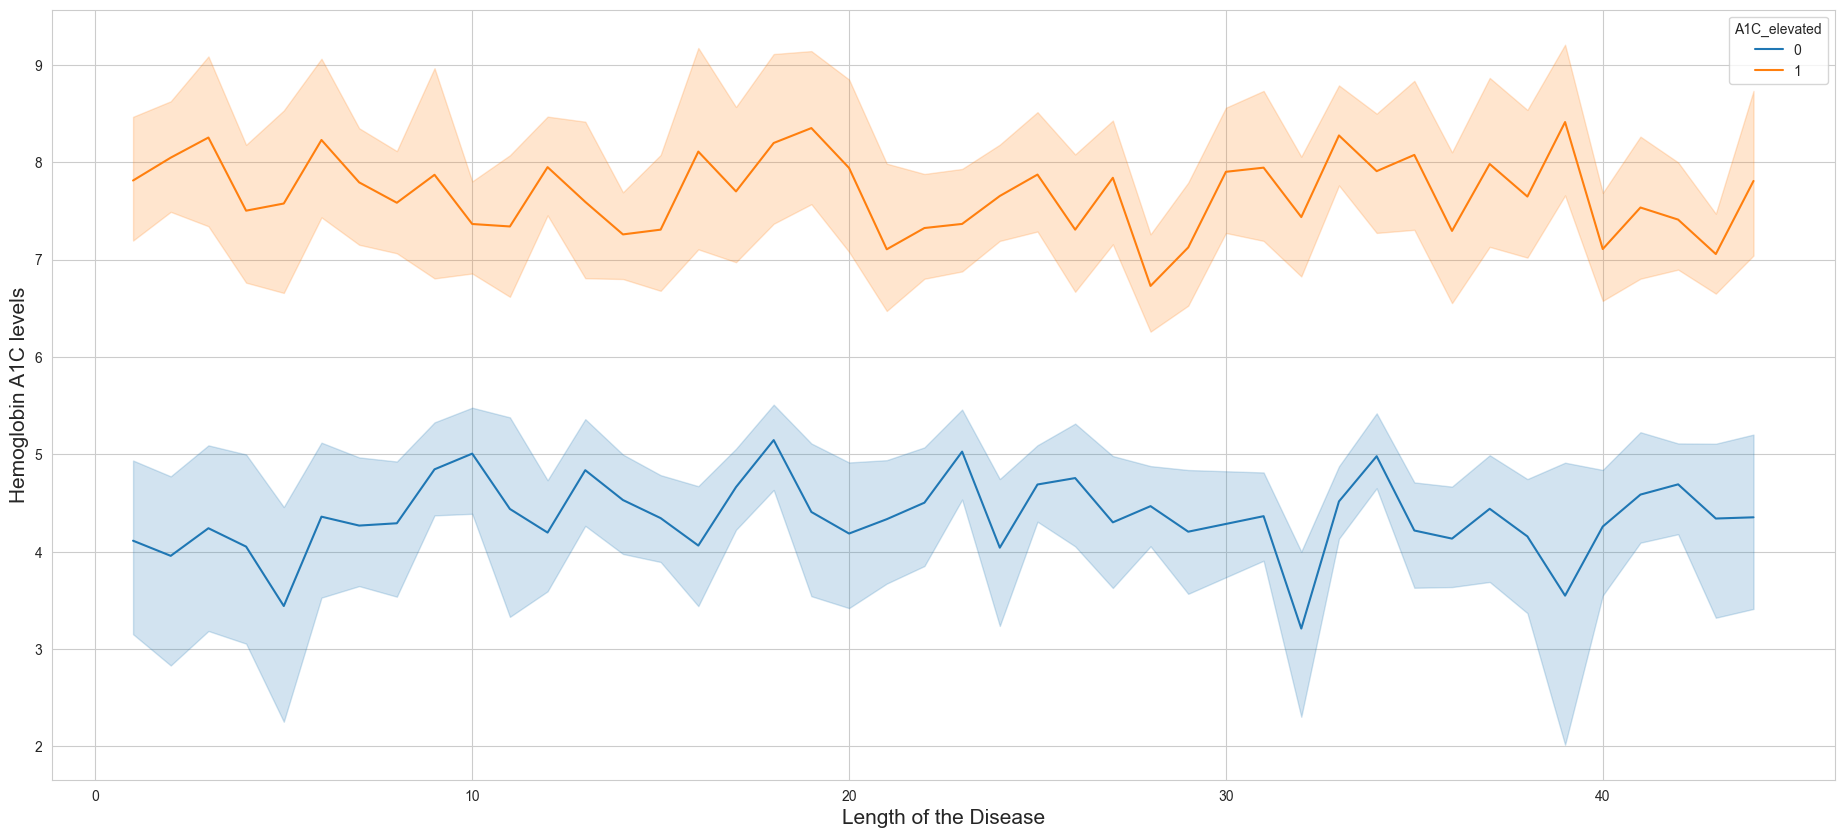

In [111]:
fig = plt.figure(figsize=(23, 10))

# sns.lineplot(data=df, x="Disease_length", y="Hemoglobin_A1C_levels", hue="A1C_elevated",style="Insulin_1_or_Tablets_0")
sns.lineplot(data=df, x="Disease_length", y="Hemoglobin_A1C_levels", hue="A1C_elevated")

plt.xlabel('Length of the Disease',fontsize=15)
plt.ylabel('Hemoglobin A1C levels',fontsize=15)
# plt.legend()

---

---

### 7. How do factors influence the outcome whether a patient will have (or not) diabetic retinopathy? Analyse whether there is a correlation or not between diabetic retinopathy and other data in the set. Do this by separating the patients into 2 groups and analyzing the characteristics of the groups with respect to various information. Plot various data points if possible.

In [112]:
# # Dividing the data set into 2 groups: with retinopathy and without retinopathy

gr_Retinopathy = df.groupby(['Diabetic_Retinopathy'])

# for group_name, group_data in gr_Retinopathy:
#     print(group_name)
#     print(group_data)

In [113]:
# group without ritenopathy

group_0=gr_Retinopathy.get_group(0).reset_index()

# group with ritenopathy

group_1=gr_Retinopathy.get_group(1).reset_index()

In [114]:
# group_0.head(1)
# group_1.head(1)

#### Comparation between the number of Hemoglobin A1C levels in patients with/witout retinopathy

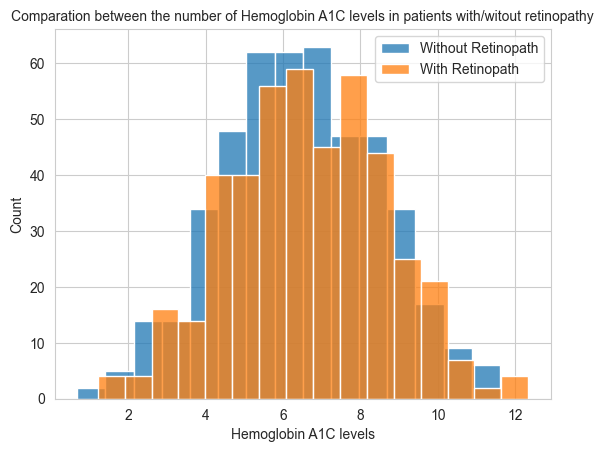

In [115]:
sns.histplot(data=group_0, x="Hemoglobin_A1C_levels",label = "Without Retinopath")
sns.histplot(data=group_1, x="Hemoglobin_A1C_levels", label = "With Retinopath")
plt.legend()

plt.xlabel('Hemoglobin A1C levels', fontsize=10)
plt.title('Comparation between the number of Hemoglobin A1C levels in patients with/witout retinopathy', fontsize=10)

plt.show()

Note:

 In patients without retinopathy, HbA1C values ​​in the range of 2-7 are more present;<br>
 In patients with retinopathy, there are more HbA1C values ​​after level 8;

------

#### Average Hemoglobin A1C levels in patients with/witout retinopathy

In [116]:
df_avg = df.groupby(['Diabetic_Retinopathy'])['Hemoglobin_A1C_levels'].mean().reset_index()
df_avg

,Diabetic_Retinopathy,Hemoglobin_A1C_levels
0,0,6.427082
1,1,6.663863


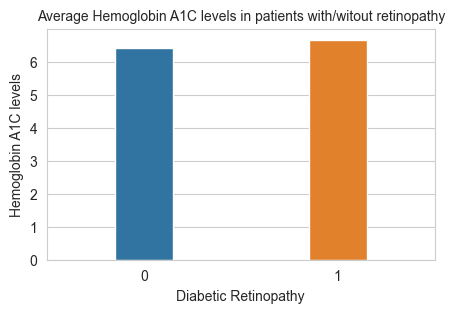

In [117]:
plt.figure(figsize=(5, 3))  # Adjust the figure size
sns.set_style("whitegrid")
sns.barplot(data=df_avg,x='Diabetic_Retinopathy',y='Hemoglobin_A1C_levels', width=0.3)

plt.xlabel('Diabetic Retinopathy', fontsize=10)
plt.ylabel('Hemoglobin A1C levels', fontsize=10)
plt.title('Average Hemoglobin A1C levels in patients with/witout retinopathy', fontsize=10)

plt.show()


Note:

 Patients with retinopathy have, on average, a higher level of HbA1C in their blood.

----

#### Average Hemoglobin A1C levels in patients with/witout retinopathy depending of therapy

In [118]:
df_cnt = df.groupby(['Diabetic_Retinopathy','Insulin_1_or_Tablets_0'])["Hemoglobin_A1C_levels"].count().reset_index()
# ["Diabetic_Retinopathy",Insulin_1_or_Tablets_0	Disease_length	Hemoglobin_A1C_levels]
df_cnt

,Diabetic_Retinopathy,Insulin_1_or_Tablets_0,Hemoglobin_A1C_levels
0,0,0,239
1,0,1,225
2,1,0,208
3,1,1,231


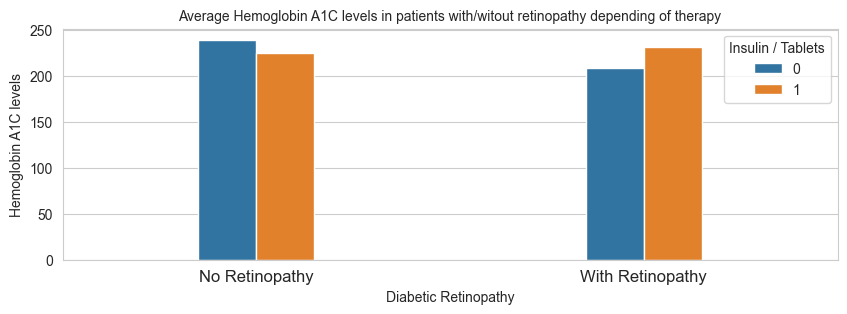

In [119]:
plt.figure(figsize=(10, 3))  # Adjust the figure size
sns.set_style("whitegrid")

cnt = sns.barplot(data=df_cnt,x='Diabetic_Retinopathy',y='Hemoglobin_A1C_levels',hue= "Insulin_1_or_Tablets_0" ,width=0.3)

plt.xlabel('Diabetic Retinopathy', fontsize=10)
plt.ylabel('Hemoglobin A1C levels', fontsize=10)
plt.title('Average Hemoglobin A1C levels in patients with/witout retinopathy depending of therapy', fontsize=10)

cnt.set_xticklabels(['No Retinopathy', 'With Retinopathy'], fontsize=12)
plt.legend(title='Insulin / Tablets', fontsize=10, title_fontsize=10)
plt.show()


Note:

1. Patients who are on insulin therapy and have retinopathy
 are more numerous than patients who are on tablets and have retinopathy.
2. It is noted that when patients switch to insulin therapy, the possibility of retinopathy increases,
 because patients who had retinopathy and are on tablets are less numerous
 from patients on insulin with retinopathy and without retinopathy.

---

#### Average Hemoglobin A1C levels per disease length and Diabetic Retinopathy

In [120]:
df_test1 = df.groupby(['Diabetic_Retinopathy'])
# df_test1

# for group_name, group_data in df_test1:
#     print(group_name)
#     print(group_data)


In [121]:
df_group_0=df_test1.get_group(0).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()

df_group_1=df_test1.get_group(1).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()

In [122]:
# df_group_0
# df_group_1

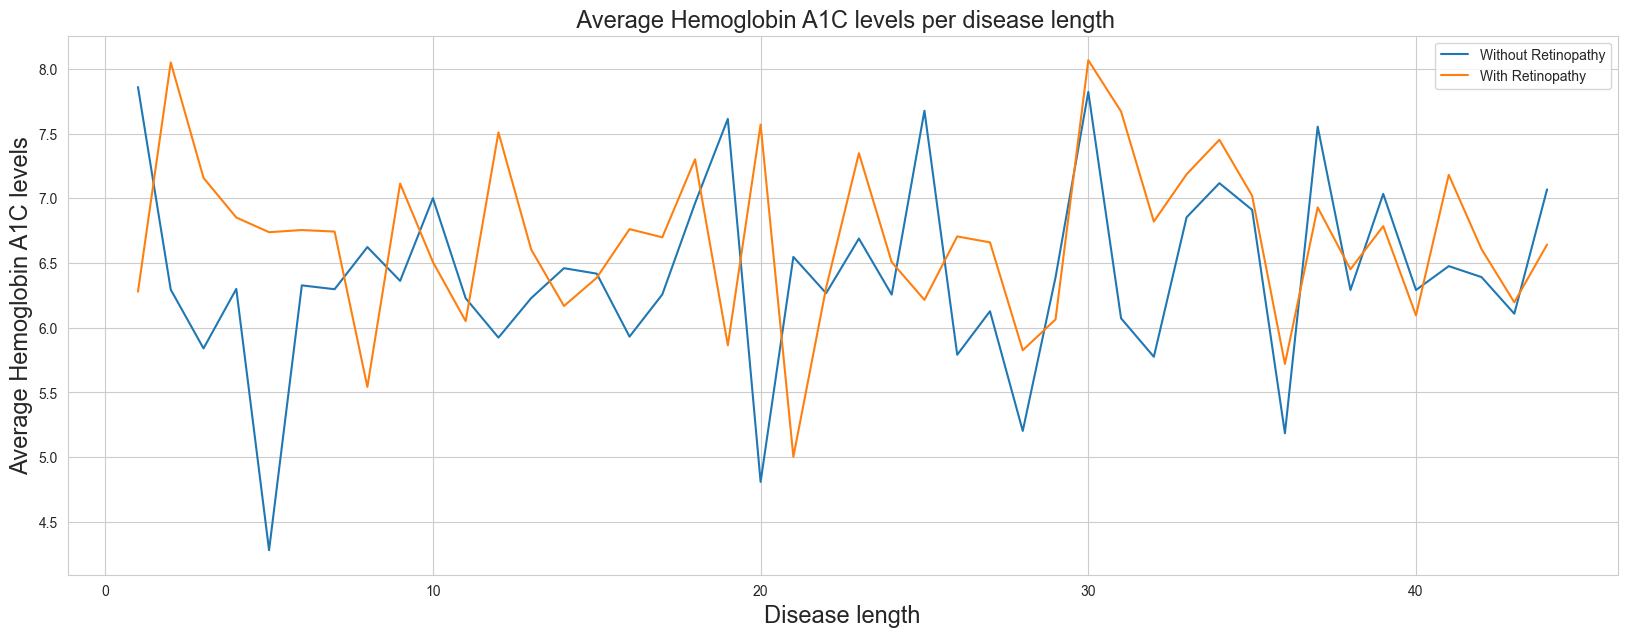

In [123]:
plt.figure(figsize=(20, 7))  # Adjust the figure size
# sns.set_style("whitegrid")
sns.lineplot(data=df_group_0,x='Disease_length',y='Hemoglobin_A1C_levels',label='Without Retinopathy')
sns.lineplot(data=df_group_1,x='Disease_length',y='Hemoglobin_A1C_levels', label ='With Retinopathy')


plt.title(" Average Hemoglobin A1C levels per disease length", fontsize=17)
plt.xlabel("Disease length", fontsize=17)
plt.ylabel("Average Hemoglobin A1C levels", fontsize=17)

plt.show()

Note:

 According to the display of the average values ​​of HbA1C by duration of the condition, for patients with and without retonopathy, for this data we cannot say that the duration of the diabetes disease has anything to do with getting retonopathy, because the two curves on the graph had a similar movement.

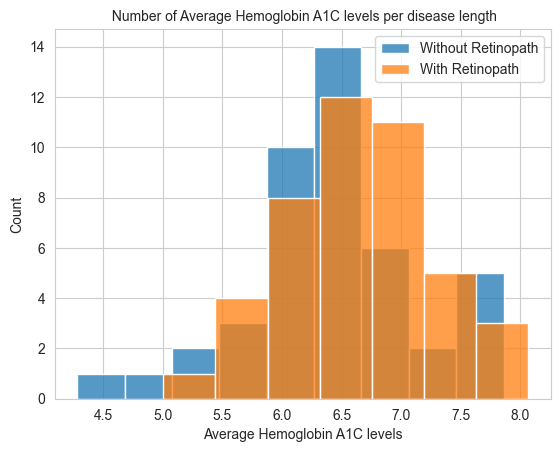

In [124]:

sns.histplot(data=df_group_0, x="Hemoglobin_A1C_levels",label = "Without Retinopath")
sns.histplot(data=df_group_1, x="Hemoglobin_A1C_levels", label = "With Retinopath")

plt.title(" Number of Average Hemoglobin A1C levels per disease length", fontsize=10)
plt.xlabel("Average Hemoglobin A1C levels", fontsize=10)
plt.legend()
plt.show()

Note:

 There are a greater number of patients with retinopathy who have elevated (above normal) values ​​of the HbA1C levels in their blood, corresponding to during the duration of the disease.

-----

#### Average Hemoglobin A1C levels per disease length in groups with/ without Diabetic Retinopathy, HbA1C elevated levels and therapy

In [125]:
df_test2 = df.groupby(['Diabetic_Retinopathy',"Disease_length","Insulin_1_or_Tablets_0"
                       ,"A1C_elevated"])['Hemoglobin_A1C_levels'].mean().reset_index()
# df_test2.head(1)

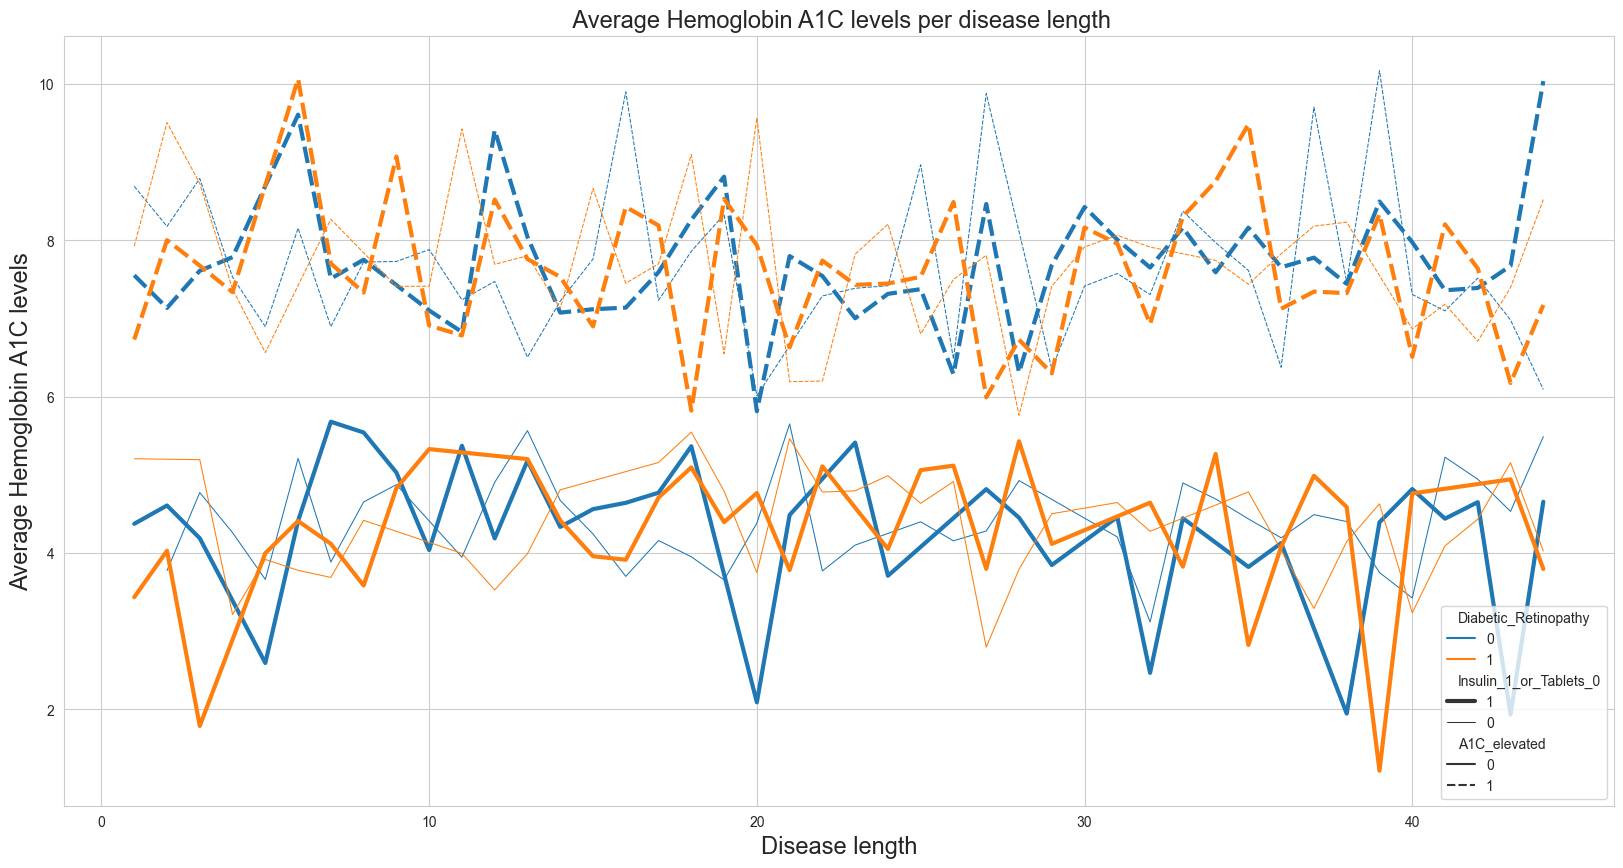

In [126]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
# sns.set_style("whitegrid")
sns.lineplot(data=df_test2,x='Disease_length',y='Hemoglobin_A1C_levels',
             hue ="Diabetic_Retinopathy",style ="A1C_elevated" , size='Insulin_1_or_Tablets_0',size_order=(1,0))

plt.title(" Average Hemoglobin A1C levels per disease length", fontsize=17)
plt.ylabel("Average Hemoglobin A1C levels", fontsize=17)
plt.xlabel("Disease length", fontsize=17)
plt.show()

Note:<br>
 Patients with a normal level of HbA1C blood sugar, who are on insulin therapy and with/without retonopathy have more frequent and sharper peaks/falls in the new HbA1C sugar compared to those on tablet therapy;
    

#### Additional plots combination

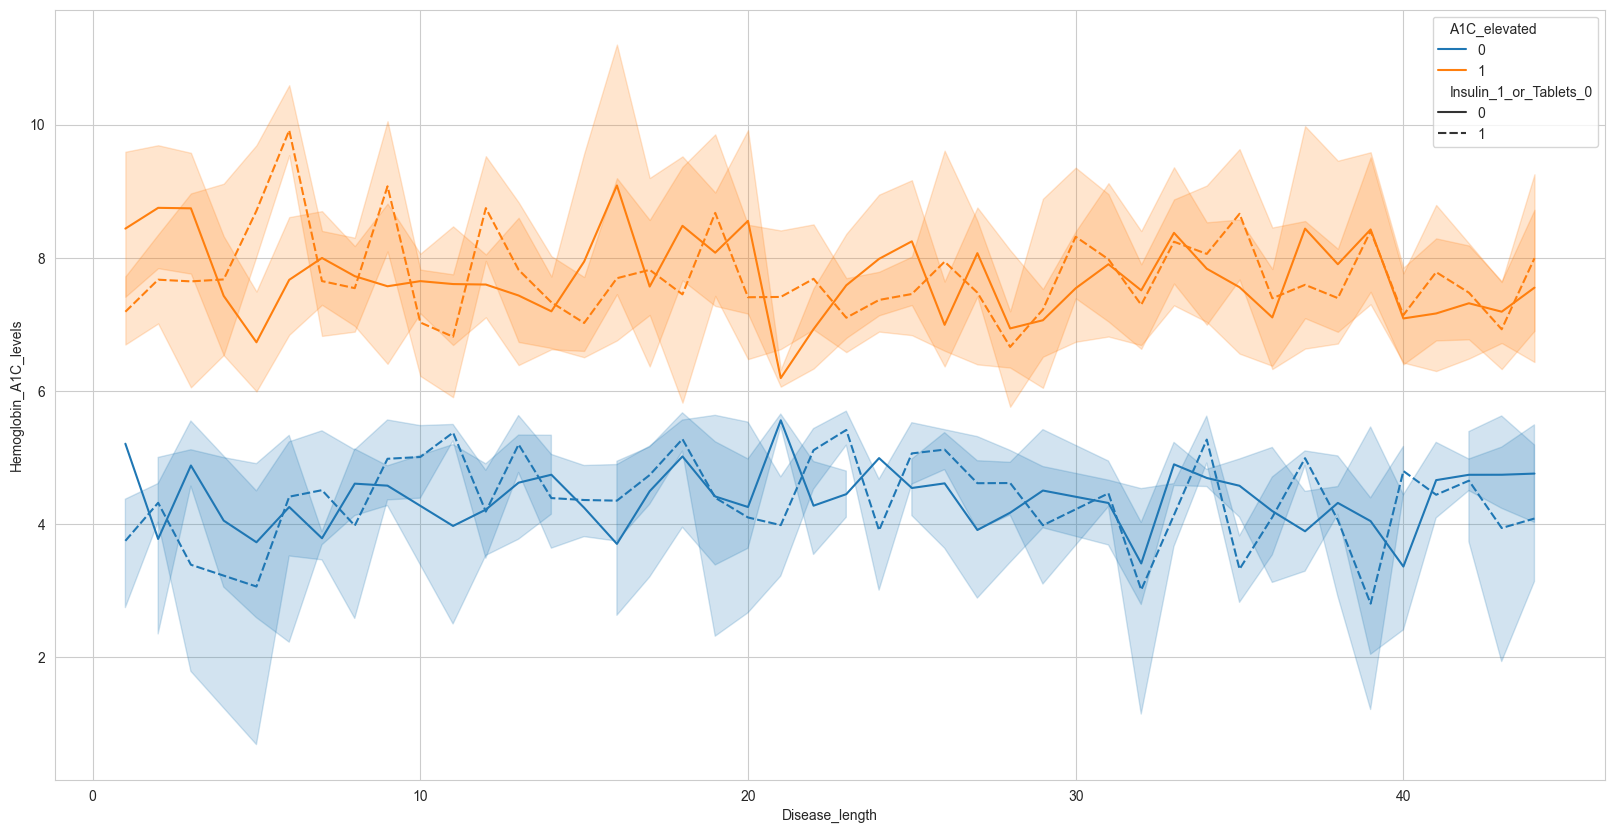

In [127]:
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="Disease_length", y="Hemoglobin_A1C_levels", hue="A1C_elevated",style="Insulin_1_or_Tablets_0")

plt.show()

Note:

The graph above shows patients with a normal 3-month sugar level (blue color)
 and patients with an elevated level of the 3-month sugar (orange color).
- In both groups, the patients who are on insulin therapy have unstable levels of the 3-month sugar
 compared to those on tablet therapy.
- In addition, patients with elevated levels of 3-month sugar and insulin therapy,
 have greater peaks in 3-month sugar levels than patients on tablet therapy.

-----

#### Partitioning according to the level (normal / elevated) of HbA1C blood sugar, and other conditions

In [128]:
df.head(1)

,Disease_length,Hemoglobin_A1C_levels,Insulin_1_or_Tablets_0,Glucose_levels,Diabetic_Retinopathy,A1C_elevated
0,3,9.522692,0,1.747037,1,1


In [129]:
group = df.groupby(['A1C_elevated','Insulin_1_or_Tablets_0','Diabetic_Retinopathy'])
# .sort_values(by='Disease_length', ascending=True)
# for group_name, group_data in group:
#     print(group_name)
#     print(group_data)
# group

In [130]:
# gruop: Normal Hb A1C, Tables therapy, Without Diabetic Retinopathy

group_000=group.get_group((0, 0, 0)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_000.head()

In [131]:
# gruop: Normal Hb A1C, Tables therapy, With Diabetic Retinopathy

group_001=group.get_group((0, 0, 1)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_001.head()

In [132]:
# gruop: Normal Hb A1C, Insulin therapy, Without Diabetic Retinopathy

group_010=group.get_group((0, 1, 0)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_010.head()

In [133]:
# gruop: Normal Hb A1C, Insulin therapy, With Diabetic Retinopathy

group_011=group.get_group((0, 1, 1)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_011.head()

In [134]:
# group: High Hb A1C, Tables therapy, Without Diabetic Retinopathy

group_100=group.get_group((1, 0, 0)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_100.head()

In [135]:
# group: High Hb A1C, Tables therapy, With Diabetic Retinopathy

group_101=group.get_group((1, 0, 1)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_101.head()

In [136]:
# group: High Hb A1C, Insulin therapy, Without Diabetic Retinopathy

group_110=group.get_group((1, 1, 0)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_110.head()

In [137]:
# group: High Hb A1C, Insulin therapy, With Diabetic Retinopathy

group_111=group.get_group((1, 1, 1)).groupby('Disease_length')['Hemoglobin_A1C_levels'].mean().reset_index()
# group_111.head()

#### Charts - Patients with normal HbA1C blood sugar levels

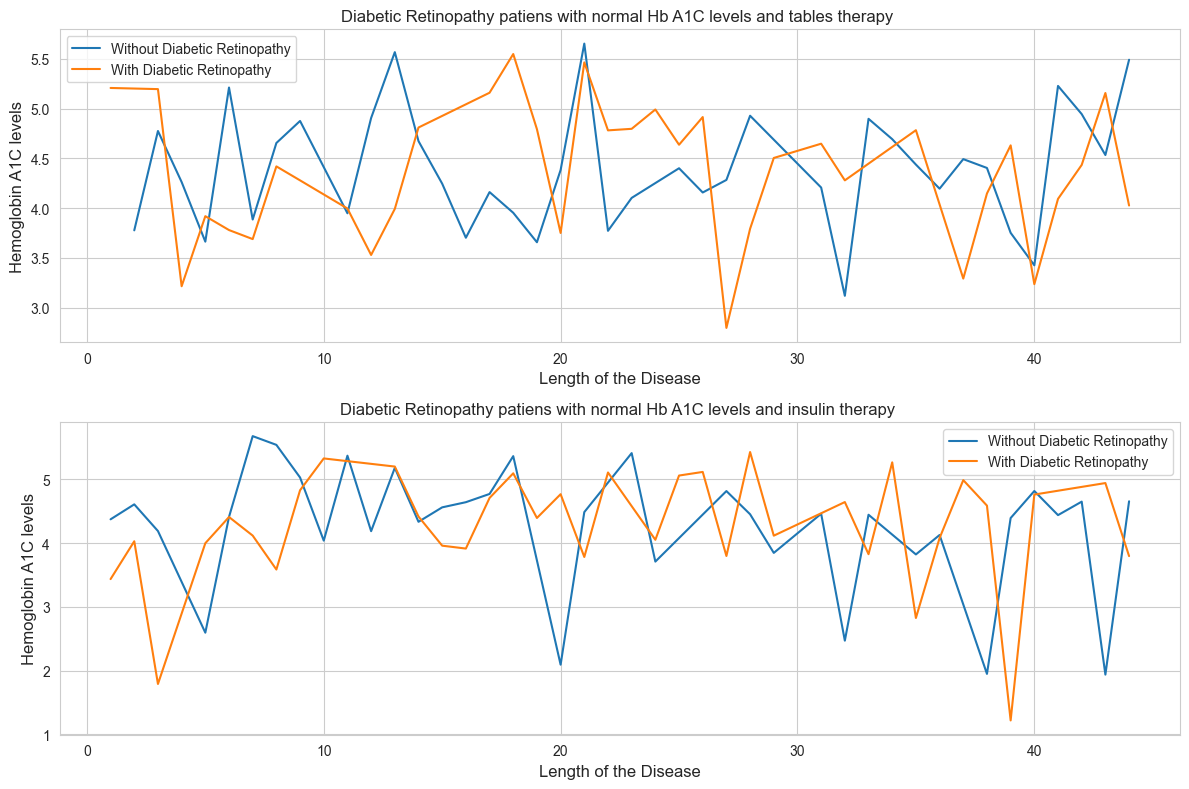

In [138]:
# Create a 2x1 subplot grid
fig, axes = plt.subplots(2,1, figsize=(12, 8))

# Plot data1 on the 1st subplot
sns.lineplot(data=group_000, x="Disease_length", y="Hemoglobin_A1C_levels",label = "Without Diabetic Retinopathy", ax=axes[0])
axes[0].set_title("Diabetic Retinopathy patiens with normal Hb A1C levels and tables therapy ")

# Plot data2 on the 2nd subplot
sns.lineplot(data=group_001, x="Disease_length", y="Hemoglobin_A1C_levels",label = "With Diabetic Retinopathy", ax=axes[0])
# axes[1,0].set_title("Patiens with normal Hb A1C levels, tables therapy and with Diabetic Retinopathy")


# Plot data3 on the 3th subplot
sns.lineplot(data=group_010, x="Disease_length", y="Hemoglobin_A1C_levels",label = "Without Diabetic Retinopathy", ax=axes[1])
axes[1].set_title("Diabetic Retinopathy patiens with normal Hb A1C levels and insulin therapy ")

# Plot data4 on the 4th subplot
sns.lineplot(data=group_011, x="Disease_length", y="Hemoglobin_A1C_levels", label = "With Diabetic Retinopathy", ax=axes[1])
# axes[1,1].set_title("Patiens with normal Hb A1C levels, insulin therapy and with Diabetic Retinopathy")
axes[0].legend()

axes[0].set_xlabel('Length of the Disease',fontsize=12)
axes[0].set_ylabel('Hemoglobin A1C levels',fontsize=12)
plt.legend()

plt.xlabel('Length of the Disease',fontsize=12)
plt.ylabel('Hemoglobin A1C levels',fontsize=12)
plt.legend()
# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Show the plot
plt.show()

Note:
1. Patients with normal HbA1C blood sugar level and insulin therapy, have more stable HbA1C sugar level (better control of HbA1C blood sugar level) at the upper limit of normal over the years;
2. In contrast, patients with tablet therapy have less stable levels, i.e. less control of HbA1C blood sugar levels.
3. Regarding the development of diabetic retinopathy, nothing significant can be observed, because in both therapies the levels of patients with and without retinopathy over the years follow the same trend of the new HbA1C blood sugar.

#### Charts - Patients with elevated HbA1C blood sugar levels

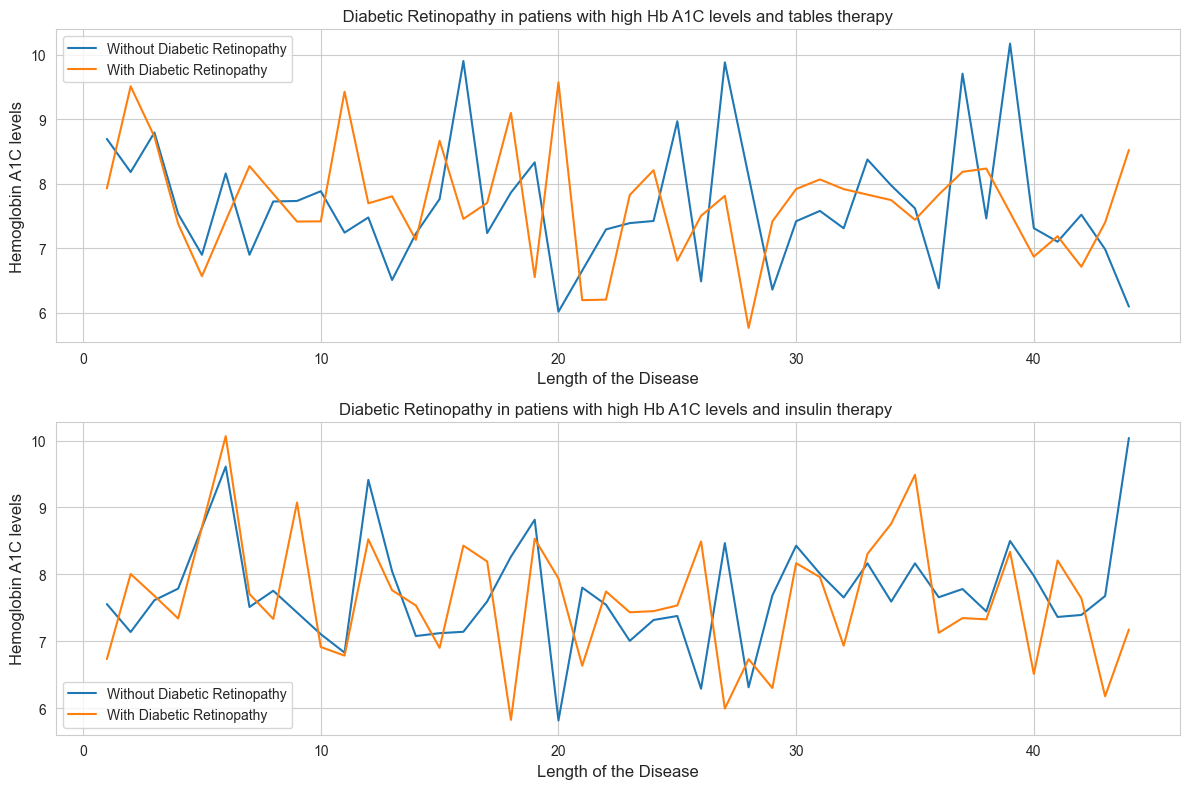

In [139]:
# Create a 2x1 subplot grid
fig, axes = plt.subplots(2,1, figsize=(12, 8))

# Plot data1 on the 1st subplot
sns.lineplot(data=group_100, x="Disease_length", y="Hemoglobin_A1C_levels",label = "Without Diabetic Retinopathy", ax=axes[0])
axes[0].set_title(" Diabetic Retinopathy in patiens with high Hb A1C levels and tables therapy ")

# Plot data2 on the 2nd subplot
sns.lineplot(data=group_101, x="Disease_length", y="Hemoglobin_A1C_levels",label = "With Diabetic Retinopathy", ax=axes[0])
# axes[1,0].set_title("Patiens with high Hb A1C levels, tables therapy and with Diabetic Retinopathy")


# Plot data3 on the 3th subplot
sns.lineplot(data=group_110, x="Disease_length", y="Hemoglobin_A1C_levels",label = "Without Diabetic Retinopathy", ax=axes[1])
axes[1].set_title("Diabetic Retinopathy in patiens with high Hb A1C levels and insulin therapy ")

# Plot data4 on the 4th subplot
sns.lineplot(data=group_111, x="Disease_length", y="Hemoglobin_A1C_levels", label = "With Diabetic Retinopathy", ax=axes[1])
# axes[1,1].set_title("Patiens with high Hb A1C levels, insulin therapy and with Diabetic Retinopathy")
axes[0].legend()

axes[0].set_xlabel('Length of the Disease',fontsize=12)
axes[0].set_ylabel('Hemoglobin A1C levels',fontsize=12)
plt.legend()

plt.xlabel('Length of the Disease',fontsize=12)
plt.ylabel('Hemoglobin A1C levels',fontsize=12)
plt.legend()
# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Show the plot
plt.show()

Note:

 Patients with a high level of HbA1C sugar and insulin therapy:
 - over time, they have, let's say, some stabilization of the level of HbA1C blood sugar, unlike patients on tablet therapy;
 - In addition, over the years, the jump in the level of HbA1C blood sugar is lower compared to patients on tablet therapy, where that jump is significantly higher

 - Regarding the development of diabetic retinopathy, nothing significant can be observed, because in both therapies the levels of patients with and without retinopathy over the years follow approximately the same trend of the new HbA1C blood sugar
 (similar to patients with normal HbA1C blood sugar levels)

---